In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import seaborn as sns
sns.set_theme(style="ticks", font_scale=2)
import os
import json
from datetime import datetime
import inspect
import os
import sys
import importlib
import matplotlib.gridspec as gridspec
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable


sys.path.append('../Classes')

# First, import the modules themselves
import my_model_class
import my_solving_class
import sgh_class

# Then, import the classes from those modules
from my_model_class import Model
from my_solving_class import Solving

# Now, reload the modules to get the latest code
importlib.reload(my_model_class)
importlib.reload(my_solving_class)

# Finally, re-import the classes to use the updated versions
from my_model_class import Model
from my_solving_class import Solving

import colorsys
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D


In [2]:
x = sgh_class.SGH_class()
m1 = Model()
s1 = Solving(m1)

red = ['#fda2b7', '#d10333', '#6c011a']
yellow = ['#fde69a', '#f9c105', '#c79b04']
blue = ['#3fb5fb', '#0384d0', '#02456c']

p = np.linspace(0.01, 2000/180, 500)
c_values = [0.4, 0.9]

In [4]:
run_code = False

if run_code:

    # tree root
    x.params.update(tree_root_active=1, shading_active=0)
    sol0 = []; sol1 = []; sol2 = []
    for precip in p:
        sol0.append(x.solutions_fsolve(p=precip, c=0))
        sol1.append(x.solutions_fsolve(p=precip, c=c_values[0]))
        sol2.append(x.solutions_fsolve(p=precip, c=c_values[1]))
    combined_array = np.hstack([p.reshape(-1, 1), np.array(sol0), np.array(sol1), np.array(sol2)])
    combined_array[:,[1,3,5]] *= 1000  # convert biomass from kg to g
    np.savetxt('tree_root.csv', combined_array)

    # shading
    x.params.update(tree_root_active=0, shading_active=1)
    sol0 = []; sol1 = []; sol2 = []
    for precip in p:
        sol0.append(x.solutions_fsolve(p=precip, c=0))
        sol1.append(x.solutions_fsolve(p=precip, c=c_values[0]))
        sol2.append(x.solutions_fsolve(p=precip, c=c_values[1]))
    combined_array = np.hstack([p.reshape(-1, 1), np.array(sol0), np.array(sol1), np.array(sol2)])
    combined_array[:,[1,3,5]] *= 1000  # convert biomass from kg to g
    np.savetxt('shading.csv', combined_array)


data_tree_root = np.loadtxt('tree_root.csv')
data_shading = np.loadtxt('shading.csv')

(p, B0_root, S0_root, B1_root, S1_root, B2_root, S2_root) = data_tree_root.T
(p, B0_shading, S0_shading, B1_shading, S1_shading, B2_shading, S2_shading) = data_shading.T

/var/folders/jm/7q3bqdxj5bs8tn13m8qn22kr0000gn/T/ipykernel_41586/985285970.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['0','20','400',''])


Text(0.025, 0.915, 'd')

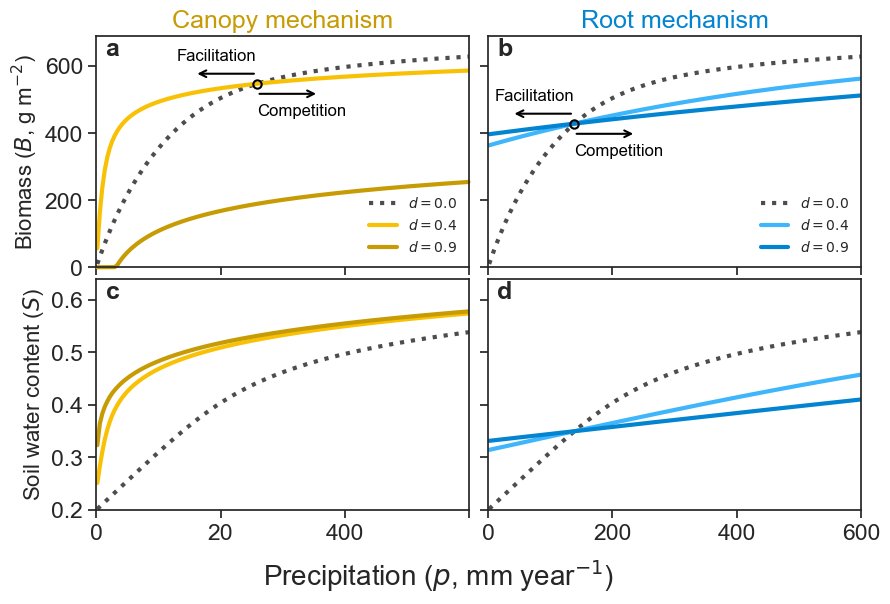

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(9, 6), sharey='row')
fig.subplots_adjust(left=0.12, bottom=0.15, right=0.97, top=0.94, wspace=0.05, hspace=0.05)
ax0, ax1, ax2, ax3 = ax.flatten()

p_smaller_600_mask = p*180 < 600

ax0.plot(p*180, B0_shading, color=3*[0.3], linewidth=3, label=r'$d=0.0$', linestyle=':')
ax0.plot(p*180, B1_shading, color=yellow[1], label=rf'$d={c_values[0]:.1f}$', linewidth=3)
ax0.plot(p[p_smaller_600_mask]*180, B2_shading[p_smaller_600_mask], color=yellow[2], label=rf'$d={c_values[1]:.1f}$', linewidth=3, clip_on=False)

ax1.plot(p*180, B0_root, color=3*[0.3], linewidth=3, label=r'$d=0.0$', linestyle=':')
ax1.plot(p*180, B1_root, color=blue[0], label=rf'$d={c_values[0]:.1f}$', linewidth=3)
ax1.plot(p*180, B2_root, color=blue[1], label=rf'$d={c_values[1]:.1f}$', linewidth=3)

idx_crossing_shading = np.argmin(np.abs(B1_shading[1:] - B0_shading[1:])) + 1
p_crossing_shading = p[idx_crossing_shading]*180
b_crossing_shading = B1_shading[idx_crossing_shading]

arrowprops = dict(arrowstyle="<-",color="black",
                  connectionstyle="angle,angleA=0,angleB=90,rad=1", linewidth=1.5)

# ---------- ax0 : shading biomass (upper-left) ----------------------
# ax0.annotate('',
#     xy=(p_crossing_shading, b_crossing_shading), xycoords='data',
#     xytext=(40, -10), textcoords='offset points', fontsize=12, color="black",
#     arrowprops=arrowprops)
# ax0.annotate('',
#     xy=(p_crossing_shading, b_crossing_shading), xycoords='data',
#     xytext=(-40, 10), textcoords='offset points', fontsize=12, color="black", ha='right',
#     arrowprops=arrowprops)
# ax0.text(p_crossing_shading, b_crossing_shading-50, 'Competition', fontsize=12, color="black", ha='left', va='top')
# ax0.text(p_crossing_shading, b_crossing_shading+50, 'Facilitation', fontsize=12, color="black", ha='right', va='bottom')

y_offset=30
ax0.annotate('',
    xy=(p_crossing_shading, b_crossing_shading-y_offset), xycoords='data',
    xytext=(p_crossing_shading+100, b_crossing_shading-y_offset), textcoords='data', fontsize=12, color="black",
    arrowprops=dict(arrowstyle="<-",color="black",
                     linewidth=1.5))
ax0.annotate('',
    xy=(p_crossing_shading, b_crossing_shading+y_offset), xycoords='data',
    xytext=(p_crossing_shading-100, b_crossing_shading+y_offset), textcoords='data', fontsize=12, color="black", ha='right',
    arrowprops=dict(arrowstyle="<-",color="black",
                     linewidth=1.5))
ax0.plot([p_crossing_shading], [b_crossing_shading], ls='none', marker='o', markerfacecolor='none', markeredgecolor='black', markersize=6, markeredgewidth=1.5)
ax0.text(p_crossing_shading, b_crossing_shading-y_offset-30, 'Competition', fontsize=12, color="black", ha='left', va='top')
ax0.text(p_crossing_shading, b_crossing_shading+y_offset+30, 'Facilitation', fontsize=12, color="black", ha='right', va='bottom')


# ---------- ax1 : tree biomass   (upper-right) ----------------------
ax1.set(xlim=(0, 600))
ax1.set_title('Root mechanism', color=blue[1])
ax1.legend(loc='lower right', frameon=False, fontsize=10)

idx_crossing_tree_root = np.argmin(np.abs(B1_root[1:] - B0_root[1:])) + 1
p_crossing_tree_root = p[idx_crossing_tree_root]*180
b_crossing_tree_root = B1_root[idx_crossing_tree_root]

ax1.annotate('',
    xy=(p_crossing_tree_root, b_crossing_tree_root-y_offset), xycoords='data',
    xytext=(p_crossing_tree_root+100, b_crossing_tree_root-y_offset), textcoords='data', fontsize=12, color="black",
    arrowprops=dict(arrowstyle="<-",color="black",
                     linewidth=1.5))
ax1.annotate('',
    xy=(p_crossing_tree_root, b_crossing_tree_root+y_offset), xycoords='data',
    xytext=(p_crossing_tree_root-100, b_crossing_tree_root+y_offset), textcoords='data', fontsize=12, color="black", ha='right',
    arrowprops=dict(arrowstyle="<-",color="black",
                     linewidth=1.5))
ax1.plot([p_crossing_tree_root], [b_crossing_tree_root], ls='none', marker='o', markerfacecolor='none', markeredgecolor='black', markersize=6, markeredgewidth=1.5)
ax1.text(p_crossing_tree_root, b_crossing_tree_root-y_offset-30, 'Competition', fontsize=12, color="black", ha='left', va='top')
ax1.text(p_crossing_tree_root, b_crossing_tree_root+y_offset+30, 'Facilitation', fontsize=12, color="black", ha='right', va='bottom')


# ax1.annotate('',
#     xy=(p_crossing_tree_root, b_crossing_tree_root), xycoords='data',
#     xytext=(40, -10), textcoords='offset points', fontsize=12, color="black",
#     arrowprops=arrowprops)
# ax1.annotate('',
#     xy=(p_crossing_tree_root, b_crossing_tree_root), xycoords='data',
#     xytext=(-40, 10), textcoords='offset points', fontsize=12, color="black", ha='right',
#     arrowprops=arrowprops)
# ax1.text(p_crossing_tree_root, b_crossing_tree_root-50, 'Competition', fontsize=12, color="black", ha='left', va='top')
# ax1.text(p_crossing_tree_root, b_crossing_tree_root+50, 'Facilitation', fontsize=12, color="black", ha='right', va='bottom')


# ---------- ax2 : shading soil water   (upper-right) ----------------------

ax2.plot(p*180, S0_shading, color=3*[0.3], linewidth=3, label=r'$c=0.00$', linestyle=':')
ax2.plot(p*180, S1_shading, color=yellow[1], label=rf'$c={c_values[0]:.2f}$', linewidth=3)
ax2.plot(p*180, S2_shading, color=yellow[2], label=rf'$c={c_values[1]:.2f}$', linewidth=3)

ax3.plot(p*180, S0_root, color=3*[0.3], linewidth=3, label=r'$d=0.0$', linestyle=':')
ax3.plot(p*180, S1_root, color=blue[0], label=rf'$d={c_values[0]:.1f}$', linewidth=3)
ax3.plot(p*180, S2_root, color=blue[1], label=rf'$d={c_values[1]:.1f}$', linewidth=3)

ax0.set_ylabel(r'Biomass ($\mathit{B}$, g m$^{-2}$)',fontsize=16)
ax0.set(xlim=(0, 600))
ax0.set(ylim=(0, 690))
ax0.set_xticklabels([])
ax0.set_title('Canopy mechanism', color=yellow[2])
ax0.legend(loc='lower right', frameon=False, fontsize=10)

ax1.set(xlim=(0, 600))
ax1.set_xticklabels([])
ax1.set(ylim=(0, 690))

ax2.set_ylabel(r'Soil water content ($\mathit{S}$)',fontsize=16)
ax2.set(xlim=(0, 600),
        ylim=(0.2, 0.64))

ax2.set_xticklabels(['0','20','400',''])
ax3.set(xlim=(0, 600),
        ylim=(0.2, 0.64))

fig.supxlabel(r'Precipitation ($\mathit{p}$, mm year$^{-1}$)', fontsize=20)

ax0.text(0.025, 0.915, 'a', transform=ax0.transAxes, fontsize=18, fontweight='bold')
ax1.text(0.025, 0.915, 'b', transform=ax1.transAxes, fontsize=18, fontweight='bold')
ax2.text(0.025, 0.915, 'c', transform=ax2.transAxes, fontsize=18, fontweight='bold')
ax3.text(0.025, 0.915, 'd', transform=ax3.transAxes, fontsize=18, fontweight='bold')
# fig.savefig('steady-state-2-mechanisms.png', dpi=300)#, bbox_inches='tight')
# fig.savefig('steady-state-2-mechanisms.pdf',        )# bbox_inches='tight')

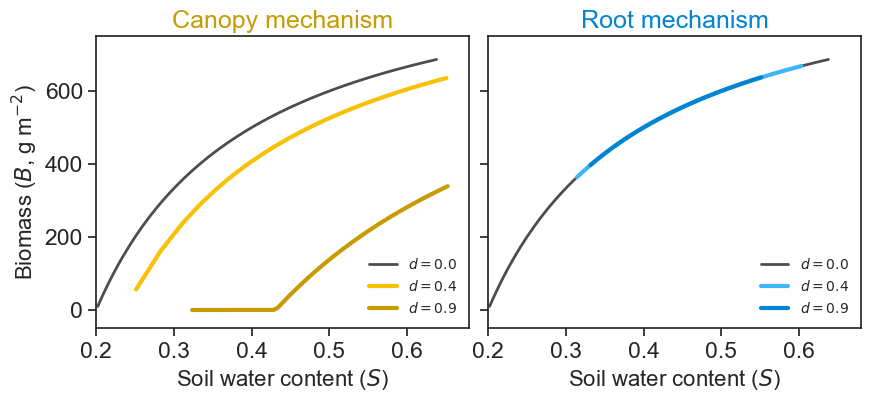

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharey='row')
fig.subplots_adjust(left=0.12, bottom=0.17, right=0.97, top=0.90, wspace=0.05, hspace=0.05)
ax0, ax1 = ax.flatten()

ax0.plot(S0_shading, B0_shading, color=3*[0.3], linewidth=2, label=r'$d=0.0$', linestyle='-')
ax0.plot(S1_shading, B1_shading, color=yellow[1], label=rf'$d={c_values[0]:.1f}$', linewidth=3)
ax0.plot(S2_shading, B2_shading, color=yellow[2], label=rf'$d={c_values[1]:.1f}$', linewidth=3)

ax1.plot(S0_root, B0_root, color=3*[0.3], linewidth=2, label=r'$d=0.0$', linestyle='-')
ax1.plot(S1_root, B1_root, color=blue[0], label=rf'$d={c_values[0]:.1f}$', linewidth=3)
ax1.plot(S2_root, B2_root, color=blue[1], label=rf'$d={c_values[1]:.1f}$', linewidth=3)
ax0.set(xlim=(0.2, 0.68), ylim=(-50, 750))
ax0.set_ylabel(r'Biomass ($\mathit{B}$, g m$^{-2}$)',fontsize=16)
ax0.set_xlabel(r'Soil water content ($\mathit{S}$)',fontsize=16)
ax0.set_title('Canopy mechanism', color=yellow[2])
ax0.legend(loc='lower right', frameon=False, fontsize=10)

ax1.set(xlim=(0.2, 0.68), ylim=(-50, 750))
ax1.set_xlabel(r'Soil water content ($\mathit{S}$)',fontsize=16)
ax1.set_title('Root mechanism', color=blue[1])
ax1.legend(loc='lower right', frameon=False, fontsize=10)

fig.savefig('biomass_vs_water.png', dpi=300)#, bbox_inches='tight')
fig.savefig('biomass_vs_water.pdf',        )# bbox_inches='tight')